In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import os

In [5]:
df = pd.read_csv("creditcard.csv")

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df['Amount'].unique()

array([149.62,   2.69, 378.66, ..., 381.05, 337.54,  95.63])

In [8]:
# Loading the data
data = pd.read_csv("creditcard.csv")
print(pd.Series({"Memory usage": "{:.2f} MB".format(data.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(data.shape)}).to_string())
data.head()

Memory usage         67.36 MB
Dataset shape    (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# Splitting the data by target class
data_0, data_1 = data[data['Class'] == 0], data[data['Class'] == 1]

# Feature-target split
X_0, y_0 = data_0.drop('Class', axis = 1), data_0['Class']
X_1, y_1 = data_1.drop('Class', axis = 1), data_1['Class']

# Splitting the authentic class and constructing the training set
X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size = 0.2, random_state = 40)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 40)
data_val_1, data_test_1 = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

# Splitting the fraudulent class
X_val, X_test, y_val, y_test = train_test_split(X_1, y_1, test_size = 0.5, random_state = 40)
data_val_2, data_test_2 = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

# Merging data to construct the validation set and the test set
data_val, data_test = pd.concat([data_val_1, data_val_2], axis = 0), pd.concat([data_test_1, data_test_2], axis = 0)
X_val, y_val = data_val.drop('Class', axis = 1), data_val['Class']
X_test, y_test = data_test.drop('Class', axis = 1), data_test['Class']

In [10]:
# Distribution of authentic and fraudulent transactions over training, validation and test set
labels = ['Train', 'Validation', 'Test']
values_0 = [len(y_train[y_train == 0]), len(y_val[y_val == 0]), len(y_test[y_test == 0])]
values_1 = [len(y_train[y_train == 1]), len(y_val[y_val == 1]), len(y_test[y_test == 1])]
fig = make_subplots(rows = 1, cols = 2, specs = [[{'type': 'domain'}, {'type': 'domain'}]])
fig.add_trace(go.Pie(values = values_0, labels = labels, hole = 0.5, textinfo = 'percent', title = "Authentic"),
              row = 1, col = 1)
fig.add_trace(go.Pie(values = values_1, labels = labels, hole = 0.5, textinfo = 'percent', title = "Fraudulent"),
              row = 1, col = 2)
text_title = "Distribution of authentic and fraudulent transactions over training, validation and test set"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()

In [11]:
# Setting the number of bins
bins_train = math.floor(len(X_train)**(1/3))

In [12]:
# Decomposing time
for df in [X_train, X_val, X_test]:
    df['Day'], temp = df['Time'] // (24*60*60), df['Time'] % (24*60*60)
    df['Hour'], temp = temp // (60*60), temp % (60*60)
    df['Minute'], df['Second'] = temp // 60, temp % 60
X_train[['Time', 'Day', 'Hour', 'Minute', 'Second']].head()

,Time,Day,Hour,Minute,Second
19594,30401.0,0.0,8.0,26.0,41.0
124712,77397.0,0.0,21.0,29.0,57.0
167920,118964.0,1.0,9.0,2.0,44.0
47377,43191.0,0.0,11.0,59.0,51.0
41731,40804.0,0.0,11.0,20.0,4.0


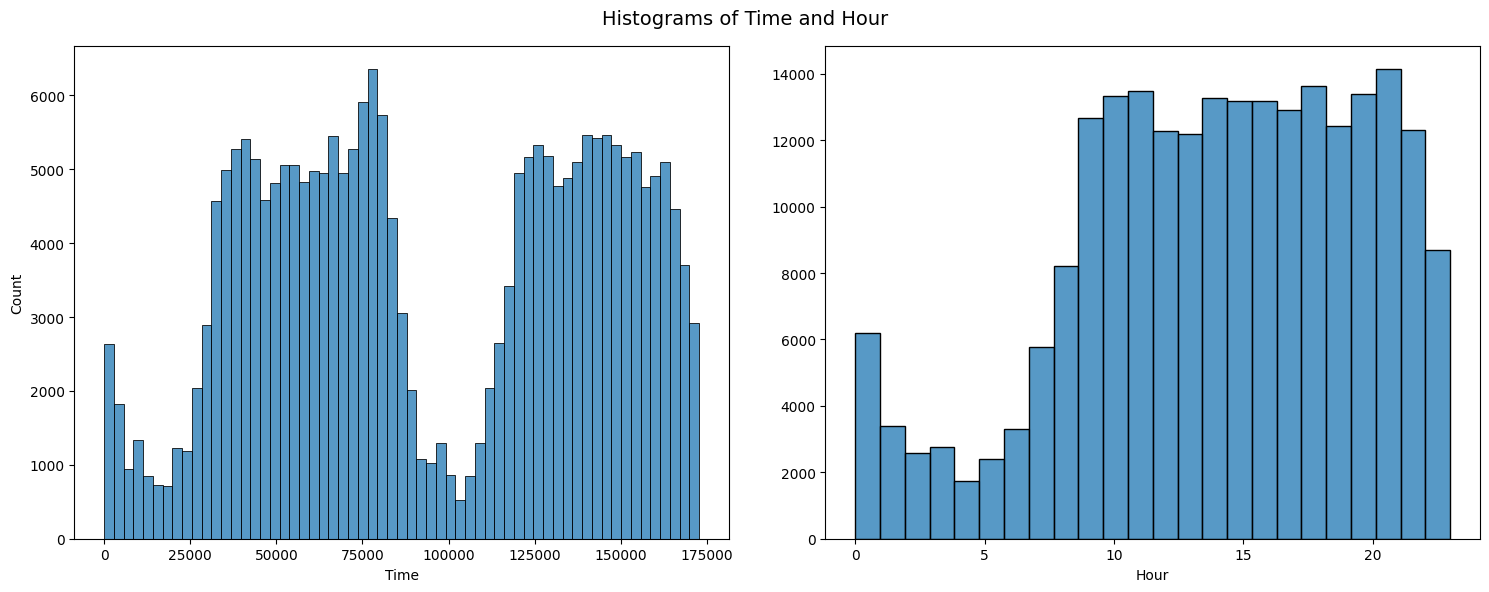

In [13]:
# Visualization
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharey = False)
sns.histplot(data = X_train, x = 'Time', bins = bins_train, ax = ax[0])
sns.histplot(data = X_train, x = 'Hour', bins = 24, ax = ax[1])
ax[1].set_ylabel(" ")
plt.suptitle("Histograms of Time and Hour", size = 14)
plt.tight_layout()
plt.show()

In [14]:
# Transformation of 'Amount'
for df in [X_train, X_val, X_test]:
    df['Amount_transformed'] = np.log10(df['Amount'] + 0.001)

In [15]:
# Discarding unnecessary columns
for df in [X_train, X_val, X_test]:
    df.drop(['Time', 'Day', 'Minute', 'Second', 'Amount'], axis = 1, inplace = True)

In [16]:
# Feature selection
cols = ['V4', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'Hour']
X_train_fs, X_val_fs, X_test_fs = X_train[cols], X_val[cols], X_test[cols]
X_train_fs.head()

,V4,V11,V12,V14,V16,V17,V18,V19,Hour
19594,-0.706232,2.027925,0.535822,0.250769,0.773615,0.449717,-1.963208,0.613481,8.0
124712,1.474933,-1.154523,0.263527,0.316174,-1.029415,1.030772,-0.438839,0.529080,21.0
167920,4.840766,-2.242431,0.034829,-0.546349,-0.070375,1.033695,0.531801,1.215045,9.0
47377,0.565273,-0.157045,-0.548790,0.419194,0.183518,-0.681323,0.911357,1.318132,11.0
41731,-0.428860,-0.580964,-0.609099,-0.187948,1.226723,0.104368,-0.995711,0.420557,11.0


In [17]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Hour,Amount_transformed
19594,1.121347,-0.699179,0.076185,-0.706232,-0.703027,-0.587016,-0.150871,-0.109071,-1.421118,0.696828,...,-0.041639,-0.487576,0.071691,0.208420,0.189962,-0.542667,-0.021184,0.022294,8.0,2.079185
124712,-1.447937,1.588026,1.510572,1.474933,-0.542238,1.561748,-2.005665,-5.053159,0.025915,-0.994011,...,-2.606748,1.190330,0.206244,0.053912,-0.245679,-0.210981,0.225635,0.042488,21.0,1.041432
167920,-2.845270,2.187520,2.506390,4.840766,-1.459572,2.847040,-3.415069,-4.340194,-0.194490,0.940258,...,-2.596990,1.565396,0.384032,0.034866,0.170369,0.622280,0.164789,-0.014722,9.0,-3.000000
47377,-0.951725,1.004371,0.644821,0.565273,-0.053900,1.912203,1.513640,0.016396,-0.752337,0.085418,...,0.028785,0.284846,-0.486074,-1.697856,0.557154,-0.001074,-0.104567,-0.074238,11.0,2.378400
41731,0.747690,-1.621906,-0.131882,-0.428860,-1.249486,-0.697124,-0.077855,-0.313109,-0.790539,0.473755,...,0.545421,0.741497,-0.536791,0.117714,0.590053,-0.013907,-0.060230,0.071999,11.0,2.567086


In [18]:
model = IsolationForest(contamination=0.1, random_state=42, verbose=1)

In [19]:
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s


,n_estimators,100
,max_samples,'auto'
,contamination,0.1
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,1
,warm_start,False


In [20]:
y_scores = model.decision_function(X_val)
y_pred = model.predict(X_val)  # 1 for inlier, -1 for outlier
y_pred = np.where(y_pred == -1, 1, 0)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [21]:
report = classification_report(y_val, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_val, y_pred)

In [22]:
(report, conf_matrix)

({'0': {'precision': 0.9990635608100199,
   'recall': 0.9006014561570117,
   'f1-score': 0.9472807991120976,
   'support': 28431.0},
  '1': {'precision': 0.07283464566929133,
   'recall': 0.9024390243902439,
   'f1-score': 0.13479052823315119,
   'support': 246.0},
  'accuracy': 0.9006172193744115,
  'macro avg': {'precision': 0.5359491032396556,
   'recall': 0.9015202402736278,
   'f1-score': 0.5410356636726243,
   'support': 28677.0},
  'weighted avg': {'precision': 0.9911180883713192,
   'recall': 0.9006172193744115,
   'f1-score': 0.9403110112459951,
   'support': 28677.0}},
 array([[25605,  2826],
        [   24,   222]], dtype=int64))

In [23]:
MODEL_DIR = "POS_model"

In [24]:
os.makedirs(MODEL_DIR, exist_ok=True)
model_path = os.path.join(MODEL_DIR, "POS.pkl")
# scaler_path = os.path.join(MODEL_DIR, "scaler.pkl")

joblib.dump(model, model_path)
# joblib.dump(scaler, scaler_path)

print(f"✅ Model saved to: {model_path}")
# print(f"✅ Scaler saved to: {scaler_path}")

✅ Model saved to: POS_model\POS.pkl


In [26]:
print(os.path.exists("POS_model/POS.pkl"))  # Should return True

True
